# **CLASSIFICATION AND REGRESSION DECISION TREES**
---

## **Introduction**

* This notebook explores **Decision Trees** through a practical approach, covering both **classification** and **regression** problems. The goal is to understand how these models learn **logical rules** to make predictions and how to **interpret their results** visually.

* The content is divided into four sections, progressing from a **custom dataset** with predefined rules to a **real-world Titanic dataset**. This allows us to see how the algorithm automatically identifies **key patterns**, such as age or gender, to predict outcomes.

* Finally, the project covers **regression trees** for predicting numerical values. It serves as a complete guide to **training, visualizing, and understanding** one of the most fundamental algorithms in **Machine Learning**.

---

## **Index:**

1. Classification Tree **WITH** Initial Logic
2. Classification Tree **WITHOUT** Initial Logic
3. Classification Tree **REAL DATASET - TITANIC**
4. Regression Tree





# **1. Classification Tree "WITH" Initial Logic**

---

In this first code chunk, we build a **custom-made dataset**, which simulates the granting of a bank loan.  

We generate a **random number of data points (n)**, but we apply specific **rules** to determine how the **target** variable should behave.

#### **1. Creation of Explanatory Variables**
200 observations are generated with three features:
- **Income_k**: Annual income in thousands of euros.
- **On_time_payment_rate**: An indicator of historical payment behavior.
- **Age**: The applicant's age.

These variables represent typical criteria used in credit risk assessment.

#### **2. Definition of the Target Variable**
The variable **Approved = 1** is created by applying a **3-level** hierarchical logic; in the event of a rejected loan, **Approved = 0**.

1. Income > 35k → Loan rejected.
2. Payments < 50% → Loan rejected.
3. Age < 25 → Loan rejected.
4. If all the above conditions are met → Loan approved.

In this way, the output of our tree is **not random**, but a direct consequence of the rules we have established.

#### **3. Objective of the Approach**
This design allows us to verify that the **decision tree algorithm correctly learns the previously established logical structure**.  

Later on, we will train a tree without imposing explicit rules so that it can **discover the patterns within the data on its own**, allowing us to compare its behavior.




In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

from sklearn import tree


# Generate 200 rows of random data
np.random.seed(42)
n = 200 # Adjust to the number of data points you feel comfortable with

data = {
    'Income_k': np.random.randint(10, 100, n),   # From 10k to 100k
    'On_time_payment_rate': np.random.randint(1, 100, n), # Score from 1% to 100%
    'Age': np.random.randint(18, 70, n)            # From 18 to 70 years old
}

df = pd.DataFrame(data)

# We apply a 3-level logic to create the 'Approved' column
def loan_decision(row):
    if row['Income_k'] < 35:
        return 0 # Level 1: Low income -> No
    elif row['On_time_payment_rate'] < 50:
        return 0 # Level 2: Bad payer -> No
    elif row['Age'] < 25:
        return 0 # Level 3: Too young -> No
    else:
        return 1 # Loan Approved

df['Approved'] = df.apply(loan_decision, axis=1)

print(f"Dataset created with {len(df)} rows.")
print(df.head(10)) # In case you want to look at the first 10 rows

Dataset created with 200 rows.
   Income_k  On_time_payment_rate  Age  Approved
0        61                     2   24         0
1        24                     3   53         0
2        81                    56   62         1
3        70                    81   37         1
4        30                    59   18         0
5        92                     2   25         0
6        96                     2   63         0
7        84                    92   33         1
8        84                    54   31         1
9        97                    87   29         1


## **1.1 Training the Decision Tree**

---

In this chunk, the **supervised learning** problem is prepared and the tree is trained.

- **X** contains the explanatory variables (*Income_k*, *On_time_payment_rate*, and *Age*).
- **y** is the target variable (**Approved**).

A **DecisionTreeClassifier** is trained with:
- **criterion='gini'**, to choose the best splits.
- **max_depth=3**, to force the tree to learn the **3 decision levels** defined in the original logic.

In this way, the model automatically learns the rules that determine whether a loan is approved or not.

In [78]:
# We define X (features) and y (target)
X = df[['Income_k', 'On_time_payment_rate', 'Age']]
y = df['Approved']

# We split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We train the tree. max_depth=3 ensures we see the 3 levels of questions
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

## **1.2 Interpretation of the Decision Tree**

---

A decision tree learns **if / else** rules from the data. Each node displays a **condition** (for example, `On_time_payment_rate <= 49.5`) that determines which branch to follow.

* **samples** indicates how many observations reach that node.  
* **value** shows how many belong to each class, for example `[138, 62]` (Denied, Approved).  
* **class** is the final assigned class, which is always the majority class.  
* **gini** measures impurity: `0` means a perfect decision, while higher values indicate a mix of classes.

The leaf nodes represent the **final decision**. The tree attempts to reduce the Gini impurity with each split, thereby automatically reconstructing the logic used to generate the data.


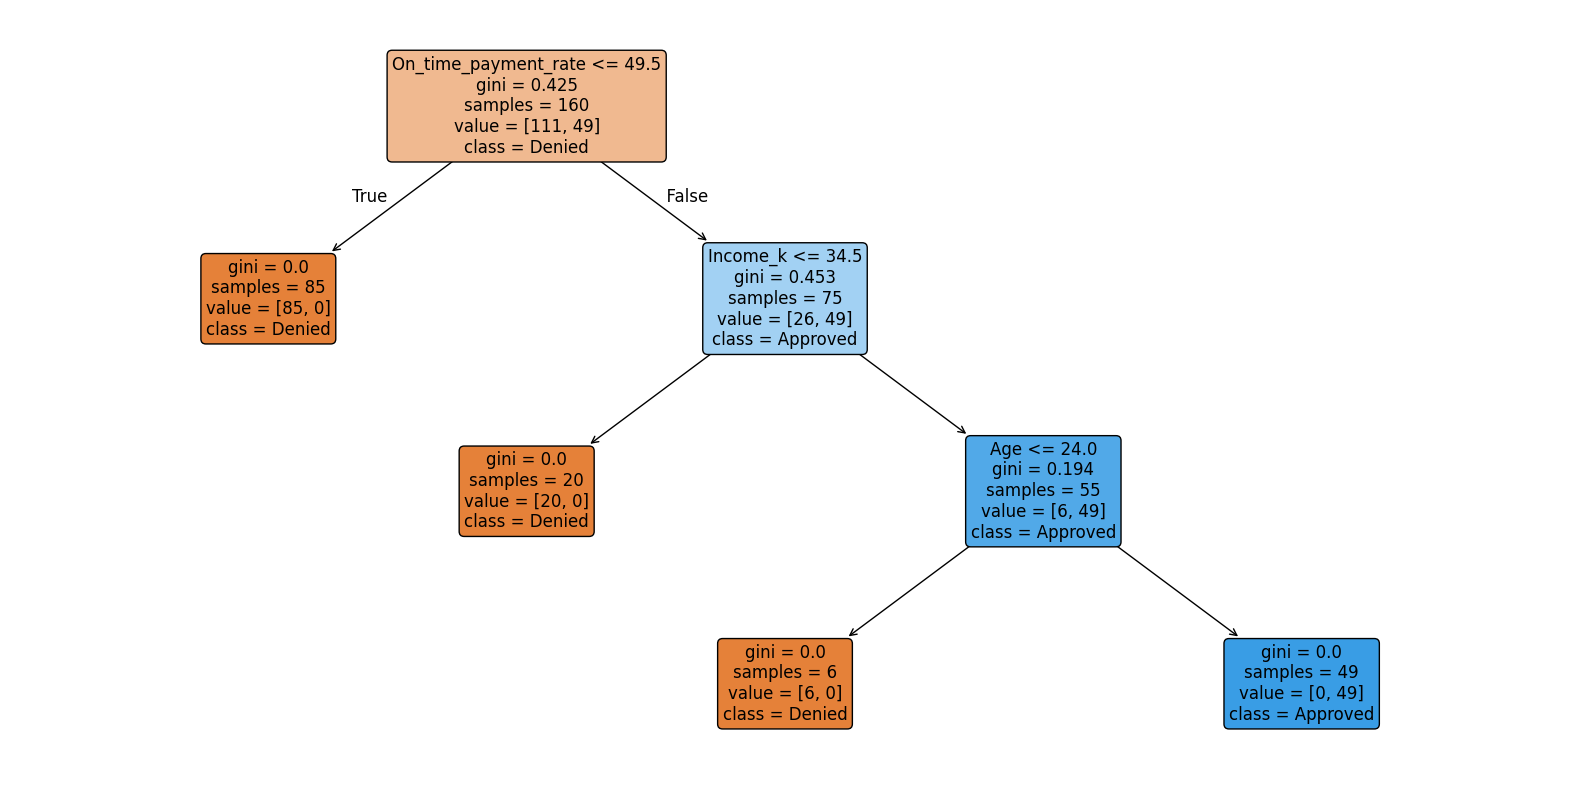

Training Performance: 100.00%


In [79]:
# We draw the resulting tree (COURTESY CHAT GPT)
plt.figure(figsize=(20,10))
plot_tree(clf,
          feature_names=['Income_k', 'On_time_payment_rate', 'Age'],
          class_names=['Denied', 'Approved'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()

# We make the model try to predict the data from the Train group
y_pred_train = clf.predict(X_train)

# We compare the predictions with the actual values (y_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

# We print the performance (it will appear below the tree graph)
print(f"Training Performance: {accuracy_train * 100:.2f}%")

## **1.3 Testing the Trained Model**

---

This step puts the tree to the test using new data that it did not use during the learning phase.

**Executing the Prediction** In the line `y_pred = clf.predict(X_test)`, the model takes the rows from `X_test` and runs them through its decision rules (if/else) until a final label is assigned.

**Calculating Success** By comparing **y_pred** with the **actual answers y_test**, we obtain the Accuracy or success rate. This **allows us to verify if the tree generalizes well or if it has fallen into overfitting**, which occurs when the model memorizes the data but fails with new information.

**If the performance on the test set is significantly lower than on the training set, the tree is overfitted**, and stopping criteria—such as reducing the maximum depth—should be applied.

In [80]:
# We make the model try to predict the data from the Test group
y_pred = clf.predict(X_test)

# We compare the predictions with the actual values (y_test)
accuracy = accuracy_score(y_test, y_pred)

# We print the performance
print(f"Test Performance (Accuracy): {accuracy * 100:.2f}%")

Test Performance (Accuracy): 100.00%


# **2. Classification Tree "WITHOUT" Initial Logic**

---

In the first case, we saw that a decision tree can determine whether a person is **eligible or not for a loan**.

Now, we remove any manually imposed rules and let the **tree learn on its own from the data**.

The goal is to observe which variables it considers most important and what combinations of income, age, or payment behavior it uses to make decisions.

This approach is more realistic, as in practice, banks do not always define fixed rules; instead, they **learn patterns from customer history**.

Later, we will take a step that is even more useful for the business: instead of classifying customers as *approved or not*, we will use a **DecisionTreeRegressor** to **predict the probability of default**. This allows us to quantify the risk for each customer and make more precise decisions.



In [81]:
# We generate n rows of random data (Adjustable in the first chunk)
np.random.seed(42)
datos_random = {
    'Income_k': np.random.randint(10, 100, n),
    'On_time_payment_rate': np.random.randint(1, 100, n),
    'Age': np.random.randint(18, 70, n),
    'Approved' : np.random.randint(0, 2, n)
}

df_random = pd.DataFrame(datos_random)

print(f"Dataset created with {len(df_random)} rows.")
# print(df.head(10)) # In case you want to look at the first 10 rows

Dataset created with 200 rows.


## **2.1 Training the Decision Tree**

---

The process is the same as in the previous tree's training.


In [82]:
# We define X (features) and y (target)
X_random = df_random[['Income_k', 'On_time_payment_rate', 'Age']]
y_random = df_random['Approved']

# We split the data into train and test
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_random, y_random, test_size=0.2, random_state=42)

# We train the tree. max_depth=3 ensures we see the 3 levels of questions
clf_random = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_random.fit(X_train_r, y_train_r)

DecisionTreeClassifier(max_depth=3)

## **2.2 Interpretation of the Decision Tree WITHOUT prior rules**

---

In this tree, predefined rules no longer exist: the model has **discovered the patterns within the data on its own**. The splits do not follow a clear business logic; instead, they are chosen solely to **reduce impurity (Gini)** at each node.

The **Gini** value indicates how mixed the classes are:
- Values close to **0** represent clear decisions.
- Values close to **0.5** indicate high uncertainty.
In this tree, many nodes with high Gini values are observed, reflecting that the data does not contain clean separations between approved and denied cases.

Using **max_depth = 4** limits the model's complexity and prevents the tree from over-fitting the data. If the depth were increased, the tree could continue splitting until it reaches nodes with a Gini value close to zero, but at the cost of **overfitting and losing generalization capability.**

In summary, this tree does not replicate known rules; instead, it acts as an **exploratory tool**, showing which variables and thresholds the model considers most relevant when no clear structure exists in the data.


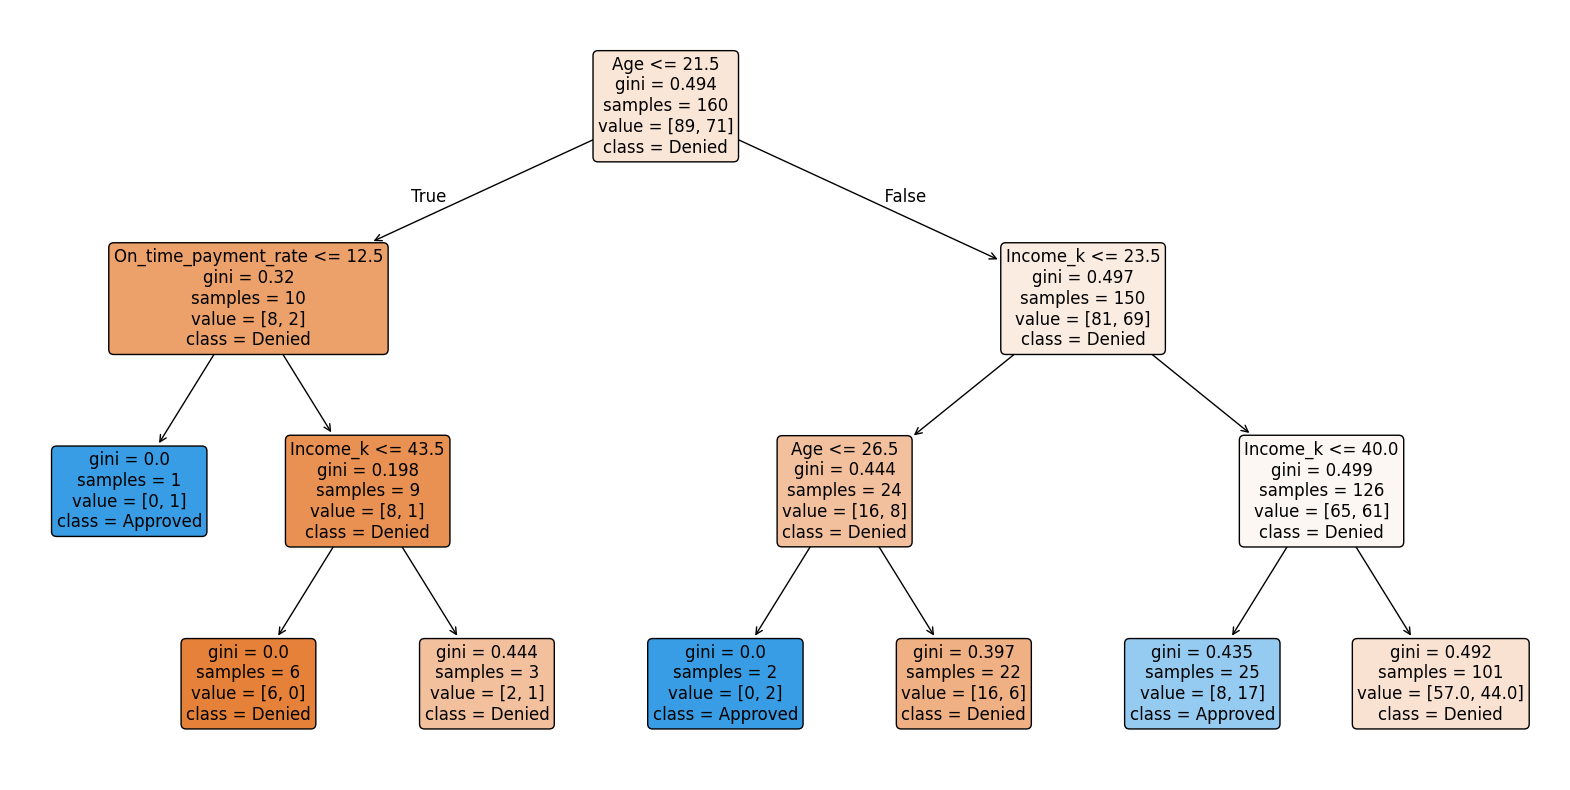

Training Performance: 55.00%


In [83]:
# Dibujamos el árbol resultante (CORTESÍA CHAT GPT)
plt.figure(figsize=(20,10))
plot_tree(clf_random,
          feature_names=['Income_k', 'On_time_payment_rate', 'Age'],
          class_names=['Denied', 'Approved'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()


# Hacemos que el modelo intente predecir los datos del grupo Train
y_pred_train_r = clf.predict(X_train_r)

# Comparamos las predicciones con la realidad (y_test)
accuracy_train_a = accuracy_score(y_train_r, y_pred_train_r)

# Hacemos un print del rendimiento (Quedará debajo del grafico del arbol)
print(f"Training Performance: {accuracy_train_a * 100:.2f}%")

# Es normal que me de un rendimiento muy bajo, porque los numeros se hab colocado completamente al azar

## **2.3 Testing the Trained Model**

---

The process is identical to the previous tree.

It is normal for the accuracy to be lower because the data was generated in a completely arbitrary manner.

In fact, the accuracy is quite poor, and therefore the model generalizes poorly. Since this is a binary classification problem, there is a 50% chance of getting it right or wrong by pure luck; consequently, **if the accuracy is below 50%, the model is quite bad.**

Again, as the data is completely random and no pattern exists, it is very **difficult for the tree to generalize anything.**

This is an example to demonstrate how decision trees function.


In [84]:
# We make the model try to predict the data from the Test group
y_pred_r = clf.predict(X_test_r)

# We compare the predictions with the actual values (y_test)
accuracy_r = accuracy_score(y_test_r, y_pred_r)

# We print the performance
print(f"Test Performance (Accuracy): {accuracy_r * 100:.2f}%")

Test Performance (Accuracy): 40.00%


# **3. Classification Tree REAL DATASET - TITANIC**
---

In this initial phase, we prepare the information so that the model can understand it.

Decision trees do not require much preprocessing, but it is necessary to perform some basic adjustments:

* **Data Loading:** We retrieve the dataset containing passenger information.
* **Data Conversion:** We transform the gender variable into a numerical format, assigning **0 for men and 1 for women**.
* **Cleaning and Selection:** We choose the most important variables such as passenger class, age, and ticket price, removing rows that contain empty data to avoid confusing the algorithm.

In [85]:
# Data Loading
df_t = sns.load_dataset('titanic')

# Preprocessing
# We convert gender to numbers: male = 0, female = 1
df_t['sex'] = df_t['sex'].map({'male': 0, 'female': 1})

# We select the columns that provide useful information and remove rows with missing data
# We include pclass (class), sex (gender), age (age), fare (price), sibsp (siblings), and parch (parents/children)
selected_columns_t = ['survived', 'pclass', 'sex', 'age', 'fare', 'sibsp', 'parch']
df_t = df_t[selected_columns_t].dropna()

## **3.1 Training the Decision Tree**

---

In this block, we split the information and train the classification algorithm.

* **Dataset Splitting:** We separate the data into a training group for the model to learn and a test group to examine it later. We use 80 percent for learning and 20 percent for evaluation.
* **Training:** The algorithm analyzes the training data to find the variables that best separate the passengers who survived from those who died, using the Gini index to measure the purity of the groups.
* **Depth Control:** We limit the tree to 3 levels of depth to avoid overfitting, which occurs when the model memorizes the data and loses its ability to generalize.

In [86]:
# We define X (features) and y (target)
X_t = df_t.drop('survived', axis=1)
y_t = df_t['survived']

# We split the data into train and test
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

# We train the tree. max_depth=3 ensures we see the 3 levels of questions
clf_t = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_t.fit(X_train_t, y_train_t)

DecisionTreeClassifier(max_depth=3)

## **3.2 Interpretation of the Decision Tree**

---

This code chunk allows us to **view the decision map created by the algorithm** and measure how well it has learned.

* **Visualization:** The diagram shows the yes-or-no questions asked by the tree. Colored boxes indicate "purer" groups, where the majority of passengers share the same outcome.
* **Training Performance:** We calculate the accuracy percentage based on the same data the model already knows. This tells us how well the tree has captured the logic of the original dataset.

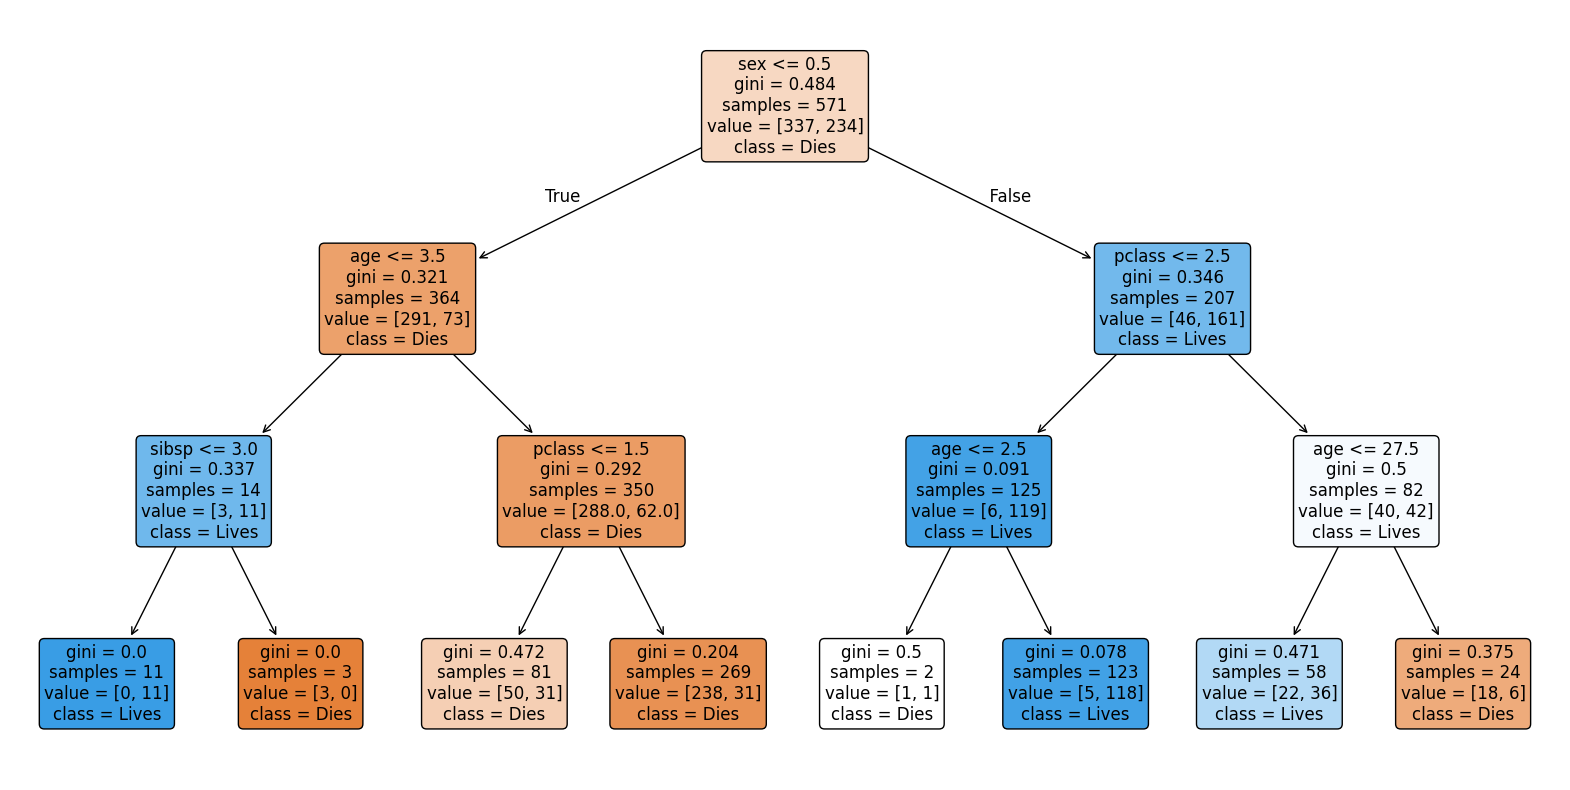

Training Performance: 83.19%


In [87]:
plt.figure(figsize=(20,10))
plot_tree(clf_t,
          feature_names=list(X_t.columns),
          class_names=['Dies', 'Lives'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()

# Performance calculation (Accuracy)
# Prediction on the data it already knows (training)
y_pred_train_t = clf_t.predict(X_train_t)
acc_train_t = accuracy_score(y_train_t, y_pred_train_t)

print(f"Training Performance: {acc_train_t * 100:.2f}%")

## **3.3 Testing the Trained Model**

---

This is the most critical part for validating the model, as we test its effectiveness using data it has never seen before.

* **Test Prediction:** The model takes the data reserved in the test set and applies the learned rules to predict whether each passenger survives or dies.
* **Test Accuracy:** By comparing these predictions with reality, we obtain the model's actual performance. If this percentage is similar to the training accuracy, it means the tree is stable and can correctly predict new cases.

In [88]:
# Prediction on the new data (test)
y_pred_test_t = clf_t.predict(X_test_t)
acc_test_t = accuracy_score(y_test_t, y_pred_test_t)

print(f"Test Performance (Accuracy): {acc_test_t * 100:.2f}%")

Test Performance (Accuracy): 74.13%


# **4. Regression Tree**

---

### Difference between Classification and Regression Trees

Although both function by splitting the dataset through questions, their final goals are different:

**Classification Tree**
* Predicts a category or class, such as Approved or Denied.
* The final result is the majority class of the elements reaching the leaf.
* It seeks maximum homogeneity or purity within its groups.
* It uses the Gini Index or Information Gain to measure the quality of a split.

**Regression Tree**
* Predicts a numerical value, such as % Payment rate.
* The final result is the mean or average of the values of the elements in the leaf.
* It seeks to reduce prediction error or the dispersion of numerical data.
* It does not use classes but continuous values to perform its calculations.

In [89]:
# We want to predict the On-time Payment Rate based on Income and Age
X = df[['Income_k', 'Age']]
y = df['On_time_payment_rate']

## **4.1 Training the Regression Tree**

---

A **DecisionTreeRegressor** is trained with:

* **squared_error:** To choose the best splits by seeking to reduce the variance of the data in each node.
* **max_depth=4:** To limit the complexity of the model and make the interpretation of the decision levels easier.

In this way, the model automatically estimates the expected numerical value based on the input features.

It works in the same way; however, now our explanatory variables **X** are income and age, while the target variable **y** is the Payment Rate.

We use the regressor because the variable we want to predict is numerical rather than categorical.

In [90]:
# We train the Regression Tree
# We no longer use 'criterion=gini' because Gini is for categories.
# Regression trees usually use Mean Squared Error (MSE).
reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=4)

## **4.2 Interpretation of the Regression Tree**

---

A regression tree learns **if / else** rules to predict a continuous numerical value. **In each node, a condition such as Age <= 61.5 is evaluated to decide which path to follow**.

* **samples:** Indicates how many observations or individuals reach that specific node.
* **value:** In regression, this number is the mean or average of the target variable values for all elements in that node.
* **squared_error:** This is the measure of error or variance. It represents how spread out the numbers are relative to the mean. An error of 0.0 means that all values in that group are identical.
* **True / False:** If the node's condition is met, you follow the path to the left (True); otherwise, to the right (False).

The **leaf nodes represent the final numerical prediction**. The tree splits the data so that the values in each leaf are as similar as possible to one another, reducing the error at each step.

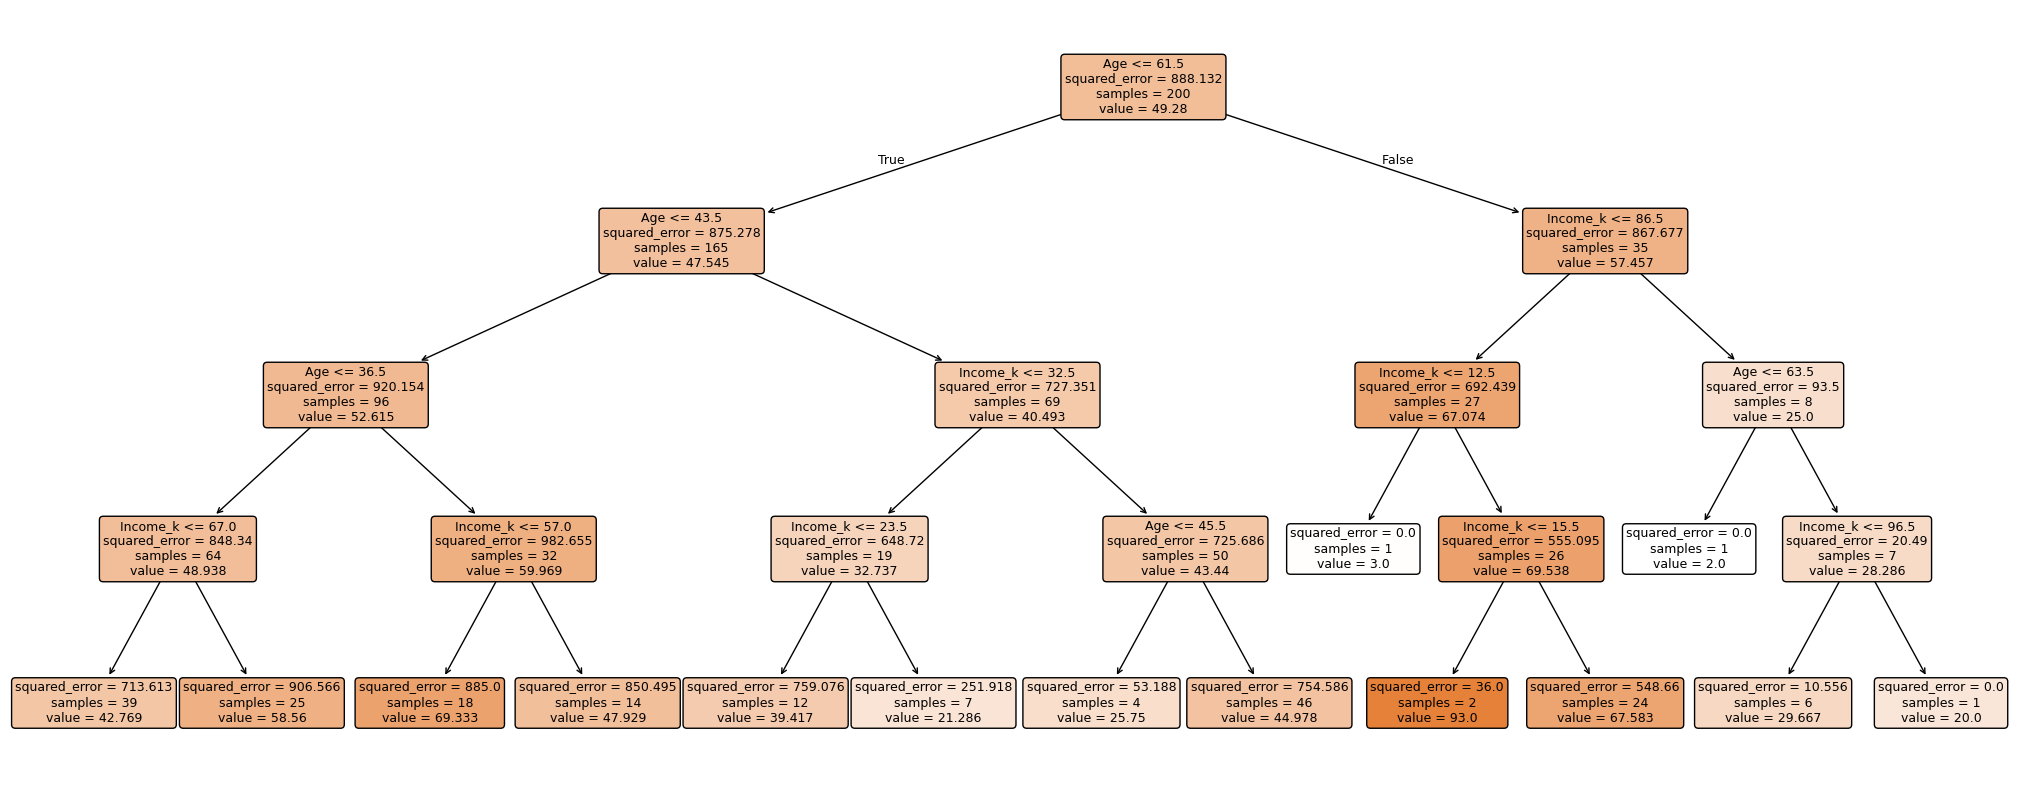

In [91]:
# 3. Visualizamos
plt.figure(figsize=(26,10))
plot_tree(reg_tree,
          feature_names=['Income_k', 'Age'],
          filled=True,
          rounded=True,
          fontsize=9)
plt.show()

# Contributors
**Name:** Joaquin De la Hoz  
**Subject:** Machine Learning  
**Degree:** Double Degree in Business Administration (ADE) and Computer Science Engineering  
**University:** CUNEF  
**Year:** 2026